In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('font', family='D2coding')

# csv파일 읽어오기

In [56]:
place_df = pd.read_csv('장소데이터.csv')
place_info_df = pd.read_csv('장소정보데이터.csv')
people_activate = pd.read_csv('연령대별_평균시간_20230525183401.csv', encoding='cp949')

# 데이터 분석

In [3]:
place_df[:5]

,수집일시,장소,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10,강남 MICE 관광특구,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10,동대문 관광특구,14000,12000,4.3,41.6,34.6,19.5
2,2023-05-20 10,명동 관광특구,20000,18000,3.5,39.0,38.4,19.2
3,2023-05-20 10,이태원 관광특구,5000,4500,3.4,43.5,34.7,18.5
4,2023-05-20 10,잠실 관광특구,30000,28000,10.8,40.5,32.4,16.2


In [4]:
place_info_df[:2]

,수집일시,장소,기온,체감온도,강수량,미세먼지지표,전체도로평균속도,전체도로평균속도현황
0,2023-05-20 10,강남 MICE 관광특구,24.1,24.2,-,좋음,16,서행
1,2023-05-20 10,동대문 관광특구,24.0,24.5,-,좋음,20,서행


In [5]:
people_activate[:5]
# 요일평균, 평일, 토요일, 일요일이 중복되고 그 아래에 계, 남자, 여자가 존재하고 연령대별과 행동분류도 중복되기 때문에 멀티인덱스로 만듦

,연령대별,행동분류별,2019,2019.1,2019.2
0,연령대별,행동분류별,평일,토요일,일요일
1,연령대별,행동분류별,계,계,계
2,10~19세(10대),개인유지,11:17,12:46,13:03
3,10~19세(10대),일,0:15,0:18,0:13
4,10~19세(10대),학습,6:38,2:32,2:19


In [6]:
place_df.info()
# 결측치 없고 수집일시의 dtype만 날짜 dtype인 datetime으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   수집일시    4250 non-null   object 
 1   장소      4250 non-null   object 
 2   최대인구    4250 non-null   int64  
 3   최소인구    4250 non-null   int64  
 4   10대     4250 non-null   float64
 5   2030대   4250 non-null   float64
 6   4050대   4250 non-null   float64
 7   6070대   4250 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 265.8+ KB


In [7]:
place_info_df.info()
# 결측치 없고 수집일시의 dtype만 날짜 dtype인 datetime으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4250 entries, 0 to 4249
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   수집일시        4250 non-null   object 
 1   장소          4250 non-null   object 
 2   기온          4250 non-null   float64
 3   체감온도        4250 non-null   float64
 4   강수량         4250 non-null   object 
 5   미세먼지지표      4250 non-null   object 
 6   전체도로평균속도    4250 non-null   int64  
 7   전체도로평균속도현황  4250 non-null   object 
dtypes: float64(2), int64(1), object(5)
memory usage: 265.8+ KB


In [8]:
people_activate.info()
# dtype을 float으로 변경

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   연령대별    56 non-null     object
 1   행동분류별   56 non-null     object
 2   2019    56 non-null     object
 3   2019.1  56 non-null     object
 4   2019.2  56 non-null     object
dtypes: object(5)
memory usage: 2.3+ KB


# 전처리
- 수집한 데이터 중 24일 데이터 삭제
- 수집한 데이터 중 수집일시의 dtype을 datetime64[ns]로 변경
<BR><BR>
- [place_df]
    - 장소분류 추가
    - 인수수 컬럼 추가(최대인구+최소인구의 평균)
<BR><BR>
- [people_activate]
    - 멀티인덱스 설정
    - dtype float으로 변경

## 수집일시의 dtype 변경

In [9]:
place_df.수집일시 = place_df.수집일시.astype('datetime64[ns]')
place_info_df.수집일시 = place_info_df.수집일시.astype('datetime64[ns]')

In [10]:
place_df.dtypes

수집일시     datetime64[ns]
장소               object
최대인구              int64
최소인구              int64
10대             float64
2030대           float64
4050대           float64
6070대           float64
dtype: object

In [11]:
place_info_df.dtypes

수집일시          datetime64[ns]
장소                    object
기온                   float64
체감온도                 float64
강수량                   object
미세먼지지표                object
전체도로평균속도               int64
전체도로평균속도현황            object
dtype: object

## 수집일이 24인 데이터 삭제

In [12]:
# 24일 데이터의 index 추출
drop_data = place_df.수집일시[place_df.수집일시.dt.day==24].index

In [13]:
# 24일 데이터의 index로 행 삭제
place_df.drop(index=drop_data).수집일시

0      2023-05-20 10:00:00
1      2023-05-20 10:00:00
2      2023-05-20 10:00:00
3      2023-05-20 10:00:00
4      2023-05-20 10:00:00
               ...        
3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, Length: 3850, dtype: datetime64[ns]

In [14]:
# 24일 데이터의 index로 행 삭제 원본적용
place_df.drop(index=drop_data, inplace=True)

In [15]:
place_df.수집일시.tail()

3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, dtype: datetime64[ns]

In [16]:
# 24일 데이터의 index 추출
drop_data = place_info_df.수집일시[place_info_df.수집일시.dt.day==24].index

In [17]:
# 24일 데이터의 index로 행 삭제
place_info_df.수집일시.drop(index=drop_data)

0      2023-05-20 10:00:00
1      2023-05-20 10:00:00
2      2023-05-20 10:00:00
3      2023-05-20 10:00:00
4      2023-05-20 10:00:00
               ...        
3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, Length: 3850, dtype: datetime64[ns]

In [18]:
# 24일 데이터의 index로 행 삭제 원본적용
place_info_df.drop(index=drop_data, inplace=True)

In [19]:
place_info_df.수집일시.tail()

3845   2023-05-23 23:00:00
3846   2023-05-23 23:00:00
3847   2023-05-23 23:00:00
3848   2023-05-23 23:00:00
3849   2023-05-23 23:00:00
Name: 수집일시, dtype: datetime64[ns]

## place_df에 장소분류 컬럼 추가
- 관광특구
- 고궁문화유산
- 공원
- 발달상권
- 인구밀집지역

In [20]:
place_df[:2]

,수집일시,장소,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10:00:00,강남 MICE 관광특구,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10:00:00,동대문 관광특구,14000,12000,4.3,41.6,34.6,19.5


In [21]:
# 장소분류할 인덱스 추출
travel_index = place_df.장소[place_df.장소.isin(place_df.장소[:7])].index
cultural_index = place_df.장소[place_df.장소.isin(place_df.장소[7:10])].index
dense_index = place_df.장소[place_df.장소.isin(place_df.장소[10:25])].index
develop_index = place_df.장소[place_df.장소.isin(place_df.장소[25:38])].index
park_index = place_df.장소[place_df.장소.isin(place_df.장소[38:50])].index

In [22]:
park_index

Index([  38,   39,   40,   41,   42,   43,   44,   45,   46,   47,
       ...
       3840, 3841, 3842, 3843, 3844, 3845, 3846, 3847, 3848, 3849],
      dtype='int64', length=924)

In [23]:
# 장소분류 컬럼 추가
place_df.insert(loc=2, column='장소분류', value=0)
place_df

,수집일시,장소,장소분류,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10:00:00,강남 MICE 관광특구,0,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10:00:00,동대문 관광특구,0,14000,12000,4.3,41.6,34.6,19.5
2,2023-05-20 10:00:00,명동 관광특구,0,20000,18000,3.5,39.0,38.4,19.2
3,2023-05-20 10:00:00,이태원 관광특구,0,5000,4500,3.4,43.5,34.7,18.5
4,2023-05-20 10:00:00,잠실 관광특구,0,30000,28000,10.8,40.5,32.4,16.2
...,...,...,...,...,...,...,...,...,...
3845,2023-05-23 23:00:00,서울숲공원,0,7000,6500,5.4,43.5,37.2,13.9
3846,2023-05-23 23:00:00,월드컵공원,0,3500,3000,9.6,38.5,36.9,15.1
3847,2023-05-23 23:00:00,이촌한강공원,0,3000,2500,6.5,39.9,35.8,17.9
3848,2023-05-23 23:00:00,잠실종합운동장,0,1500,1000,12.9,34.7,40.7,11.7


In [24]:
# 장소분류 설정
place_df.loc[travel_index, '장소분류'] = '관광특구'
place_df.loc[cultural_index, '장소분류'] = '고궁문화유산'
place_df.loc[dense_index, '장소분류'] = '인구밀집지역'
place_df.loc[develop_index, '장소분류'] = '발달상권'
place_df.loc[park_index, '장소분류'] = '공원'

In [25]:
place_df.장소분류.value_counts()

장소분류
인구밀집지역    1155
발달상권      1001
공원         924
관광특구       539
고궁문화유산     231
Name: count, dtype: int64

## 인구수 컬럼 추가

In [26]:
# 인구수
(place_df.최대인구+place_df.최소인구) // 2

0        5250
1       13000
2       19000
3        4750
4       29000
        ...  
3845     6750
3846     3250
3847     2750
3848     1250
3849     3250
Length: 3850, dtype: int64

In [27]:
# 인구수 컬럼 추가
place_df.insert(loc=3, column='인구수', value=(place_df.최대인구+place_df.최소인구) // 2)
place_df

,수집일시,장소,장소분류,인구수,최대인구,최소인구,10대,2030대,4050대,6070대
0,2023-05-20 10:00:00,강남 MICE 관광특구,관광특구,5250,5500,5000,4.7,45.5,38.6,11.3
1,2023-05-20 10:00:00,동대문 관광특구,관광특구,13000,14000,12000,4.3,41.6,34.6,19.5
2,2023-05-20 10:00:00,명동 관광특구,관광특구,19000,20000,18000,3.5,39.0,38.4,19.2
3,2023-05-20 10:00:00,이태원 관광특구,관광특구,4750,5000,4500,3.4,43.5,34.7,18.5
4,2023-05-20 10:00:00,잠실 관광특구,관광특구,29000,30000,28000,10.8,40.5,32.4,16.2
...,...,...,...,...,...,...,...,...,...,...
3845,2023-05-23 23:00:00,서울숲공원,공원,6750,7000,6500,5.4,43.5,37.2,13.9
3846,2023-05-23 23:00:00,월드컵공원,공원,3250,3500,3000,9.6,38.5,36.9,15.1
3847,2023-05-23 23:00:00,이촌한강공원,공원,2750,3000,2500,6.5,39.9,35.8,17.9
3848,2023-05-23 23:00:00,잠실종합운동장,공원,1250,1500,1000,12.9,34.7,40.7,11.7


In [58]:
# 최대인구 최소인구 컬럼 삭제
place_df.drop(columns=['최대인구', '최소인구'])

,수집일시,장소,10대,2030대,4050대,6070대
0,2023-05-20 10,강남 MICE 관광특구,4.7,45.5,38.6,11.3
1,2023-05-20 10,동대문 관광특구,4.3,41.6,34.6,19.5
2,2023-05-20 10,명동 관광특구,3.5,39.0,38.4,19.2
3,2023-05-20 10,이태원 관광특구,3.4,43.5,34.7,18.5
4,2023-05-20 10,잠실 관광특구,10.8,40.5,32.4,16.2
...,...,...,...,...,...,...
4245,2023-05-24 07,서울숲공원,3.3,27.5,48.9,20.3
4246,2023-05-24 07,월드컵공원,4.7,24.9,48.7,21.7
4247,2023-05-24 07,이촌한강공원,4.7,25.7,48.7,20.9
4248,2023-05-24 07,잠실종합운동장,3.6,19.8,55.8,20.8


In [59]:
# 최대인구 최소인구 컬럼 삭제 원본 적용
place_df.drop(columns=['최대인구', '최소인구'], inplace=True)
place_df.columns

Index(['수집일시', '장소', '10대', '2030대', '4050대', '6070대'], dtype='object')

## people_activate 멀티인덱스 설정

In [60]:
people_activate = people_activate.set_index(['연령대별', '행동분류별'])
people_activate.columns = people_activate.iloc[0].values
people_activate.drop(index='연령대별', inplace=True)
people_activate.columns

Index(['평일', '토요일', '일요일'], dtype='object')

In [61]:
people_activate.index

MultiIndex([('10~19세(10대)',         '개인유지'),
            ('10~19세(10대)',            '일'),
            ('10~19세(10대)',           '학습'),
            ('10~19세(10대)',         '가정관리'),
            ('10~19세(10대)', '가족 및 가구원 돌보기'),
            ('10~19세(10대)',  '자원봉사 및 무급연수'),
            ('10~19세(10대)',    '교제 및 참여활동'),
            ('10~19세(10대)',    '문화 및 여가활동'),
            ('10~19세(10대)',           '이동'),
            ('20~29세(20대)',         '개인유지'),
            ('20~29세(20대)',            '일'),
            ('20~29세(20대)',           '학습'),
            ('20~29세(20대)',         '가정관리'),
            ('20~29세(20대)', '가족 및 가구원 돌보기'),
            ('20~29세(20대)',  '자원봉사 및 무급연수'),
            ('20~29세(20대)',    '교제 및 참여활동'),
            ('20~29세(20대)',    '문화 및 여가활동'),
            ('20~29세(20대)',           '이동'),
            ('30~39세(30대)',         '개인유지'),
            ('30~39세(30대)',            '일'),
            ('30~39세(30대)',           '학습'),
            ('30~39세(30대)',         '가정관리'),
          

## dtype 설정

In [78]:
people_activate.dtypes

평일     object
토요일    object
일요일    object
dtype: object

In [80]:
# 모든 컬럼의 dtype을 datetime64[ns]으로 변경
people_activate = people_activate.astype('datetime64[ns]')
people_activate

C:\Users\hi-sinchon\AppData\Local\Temp\ipykernel_16528\3609761498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  people_activate = people_activate.astype('datetime64[ns]')
C:\Users\hi-sinchon\AppData\Local\Temp\ipykernel_16528\3609761498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  people_activate = people_activate.astype('datetime64[ns]')
C:\Users\hi-sinchon\AppData\Local\Temp\ipykernel_16528\3609761498.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  people_activate = people_activate.astype('datetime64[ns]')


평일                 토요일   
연령대별        행동분류별                                                  
10~19세(10대) 개인유지         2023-05-25 11:17:00 2023-05-25 12:46:00  \
            일            2023-05-25 00:15:00 2023-05-25 00:18:00   
            학습           2023-05-25 06:38:00 2023-05-25 02:32:00   
            가정관리         2023-05-25 00:14:00 2023-05-25 00:29:00   
            가족 및 가구원 돌보기 2023-05-25 00:01:00 2023-05-25 00:02:00   
            자원봉사 및 무급연수  2023-05-25 00:01:00 2023-05-25 00:03:00   
            교제 및 참여활동    2023-05-25 00:53:00 2023-05-25 01:02:00   
            문화 및 여가활동    2023-05-25 03:15:00 2023-05-25 05:33:00   
            이동           2023-05-25 01:26:00 2023-05-25 01:15:00   
20~29세(20대) 개인유지         2023-05-25 11:22:00 2023-05-25 12:17:00   
            일            2023-05-25 04:03:00 2023-05-25 02:01:00   
            학습           2023-05-25 01:55:00 2023-05-25 01:11:00   
            가정관리         2023-05-25 00:42:00 2023-05-25 01:02:00   
            가족 및 가구원 돌보기 2023-05-25 00:13:00 2023-05-25 00:11:00   
            자원봉사 및 무급연수  2023-05-25 00:01:00 2023-05-25 00:02:00   
            교제 및 참여활동    2023-05-25 00:55:00 2023-05-25 01:11:00   
            문화 및 여가활동    2023-05-25 03:03:00 2023-05-25 04:24:00   
            이동           2023-05-25 01:47:00 2023-05-25 01:41:00   
30~39세(30대) 개인유지         2023-05-25 10:56:00 2023-05-25 12:17:00   
            일            2023-05-25 05:21:00 2023-05-25 02:04:00   
            학습           2023-05-25 00:15:00 2023-05-25 00:15:00   
            가정관리         2023-05-25 01:22:00 2023-05-25 01:50:00   
            가족 및 가구원 돌보기 2023-05-25 01:11:00 2023-05-25 01:12:00   
            자원봉사 및 무급연수  2023-05-25 00:01:00 2023-05-25 00:02:00   
            교제 및 참여활동    2023-05-25 00:39:00 2023-05-25 00:54:00   
            문화 및 여가활동    2023-05-25 02:24:00 2023-05-25 03:46:00   
            이동           2023-05-25 01:50:00 2023-05-25 01:40:00   
40~49세(40대) 개인유지         2023-05-25 10:50:00 2023-05-25 11:59:00   
            일            2023-05-25 05:29:00 2023-05-25 02:18:00   
            학습           2023-05-25 00:09:00 2023-05-25 00:07:00   
            가정관리         2023-05-25 01:40:00 2023-05-25 02:13:00   
            가족 및 가구원 돌보기 2023-05-25 00:31:00 2023-05-25 00:32:00   
            자원봉사 및 무급연수  2023-05-25 00:01:00 2023-05-25 00:02:00   
            교제 및 참여활동    2023-05-25 00:45:00 2023-05-25 00:57:00   
            문화 및 여가활동    2023-05-25 02:40:00 2023-05-25 04:10:00   
            이동           2023-05-25 01:55:00 2023-05-25 01:43:00   
50~59세(50대) 개인유지         2023-05-25 11:06:00 2023-05-25 11:39:00   
            일            2023-05-25 05:03:00 2023-05-25 03:04:00   
            학습           2023-05-25 00:05:00 2023-05-25 00:05:00   
            가정관리         2023-05-25 01:46:00 2023-05-25 02:05:00   
            가족 및 가구원 돌보기 2023-05-25 00:09:00 2023-05-25 00:07:00   
            자원봉사 및 무급연수  2023-05-25 00:01:00 2023-05-25 00:02:00   
            교제 및 참여활동    2023-05-25 00:51:00 2023-05-25 01:02:00   
            문화 및 여가활동    2023-05-25 03:15:00 2023-05-25 04:13:00   
            이동           2023-05-25 01:44:00 2023-05-25 01:43:00   
60세이상       개인유지         2023-05-25 11:52:00 2023-05-25 12:07:00   
            일            2023-05-25 02:19:00 2023-05-25 01:33:00   
            학습           2023-05-25 00:03:00 2023-05-25 00:02:00   
            가정관리         2023-05-25 02:07:00 2023-05-25 02:17:00   
            가족 및 가구원 돌보기 2023-05-25 00:10:00 2023-05-25 00:07:00   
            자원봉사 및 무급연수  2023-05-25 00:03:00 2023-05-25 00:02:00   
            교제 및 참여활동    2023-05-25 01:11:00 2023-05-25 01:19:00   
            문화 및 여가활동    2023-05-25 04:54:00 2023-05-25 05:20:00   
            이동           2023-05-25 01:22:00 2023-05-25 01:13:00   

                                         일요일  
연령대별        행동분류별                             
10~19세(10대) 개인유지         2023-05-25 13:03:00  
            일            2023-05-25 00:13:00  
            학습           2023-05-25 02:19:00 

# 가설 검증
- 나이대별 평일과 주말의 장소 이용 시간대를 분석해 혼잡한 시간을 피해 이용할 수 있게 데이터를 제공

## 주말에 문화 및 여가활동을 가장 많이 하는 나이대는 2030대일 것이다.
- people_activate

In [121]:
people_activate.iloc[7::9]

,,평일,토요일,일요일
연령대별,행동분류별,,,
10~19세(10대),문화 및 여가활동,2023-05-25 03:15:00,2023-05-25 05:33:00,2023-05-25 05:22:00
20~29세(20대),문화 및 여가활동,2023-05-25 03:03:00,2023-05-25 04:24:00,2023-05-25 04:36:00
30~39세(30대),문화 및 여가활동,2023-05-25 02:24:00,2023-05-25 03:46:00,2023-05-25 04:15:00
40~49세(40대),문화 및 여가활동,2023-05-25 02:40:00,2023-05-25 04:10:00,2023-05-25 04:34:00
50~59세(50대),문화 및 여가활동,2023-05-25 03:15:00,2023-05-25 04:13:00,2023-05-25 04:44:00
60세이상,문화 및 여가활동,2023-05-25 04:54:00,2023-05-25 05:20:00,2023-05-25 05:27:00


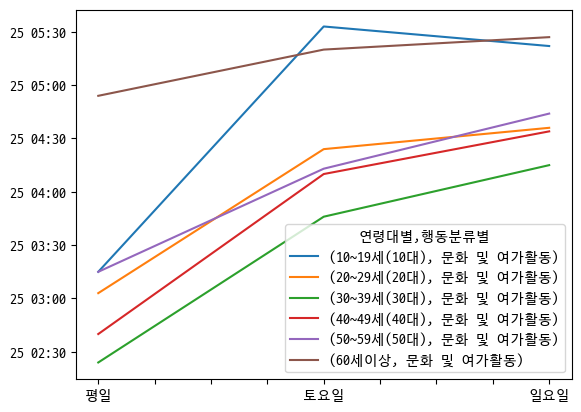

In [120]:
fig = people_activate.iloc[7::9].T.plot()

- 토요일에 여가활동을 가장 많이 하는 나이대는 5시간 33분으로 10대가 가장 높았고, 다음으로 5시간 20분으로 60세이상이 높았다. 가장 높을 것이라 예상한 20대의 여과활동시간은 4시간 24분으로 3번째에 위치했다.
<br><br>
- 일요일에 여가활동을 가장 많이 하는 나이대는 5시간 27분으로 60세이상이 가장 높았고, 다음으로 5시간 22분으로 10대가 높았다. 가장 높을 것이라 예상한 20대의 여과활동시간은 4시간 36분으로 4시간 44분 여가활동을 하는 50대 다음으로 높은 4번째에 위치했다.

In [ ]:
people_activate.loc['10~19세(10대)']

In [ ]:
people_activate.iloc[7::9,3::3]

In [ ]:

people_activate.plot(
    x=
)

In [ ]:
# 장소별 요일별 시간별 데이터 추출
s_loc_df = place_df.sort_values(by=['장소', '수집일시'])
loc_weekend = s_loc_df[s_loc_df.수집일시.dt.day < 22][['수집일시', '장소', '인구수']].reset_index(drop=True)
loc_week = s_loc_df[s_loc_df.수집일시.dt.day >= 22][['수집일시', '장소', '인구수']].reset_index(drop=True)

In [ ]:
loc_weekend.tail()

## 주말에 10대가 가장 많이 이용하는 장소는 관광특구인 강남일 것이다.

In [ ]:
loc_week.tail()

In [ ]:
# 주말의 시간별 인구 증감률 컬럼 추가
loc_weekend['인구증감률'] = loc_weekend.인구수 - loc_weekend.인구수.shift()
loc_weekend[:5]

In [ ]:
# 결측치 처리, dtype 변경
loc_weekend.인구증감률 = loc_weekend.인구증감률.fillna(0).astype(int)
loc_weekend[:5]

In [ ]:
# 평일의 시간별 인구 증감률 컬럼 추가
loc_week['인구증감률'] = loc_week.인구수 - loc_week.인구수.shift()
loc_week[:5]

In [ ]:
# 결측치 처리, dtype 변경
loc_week.인구증감률 = loc_week.인구증감률.fillna(0).astype(int)
loc_week[:5]

## 가설 3. 평일에 가장 많이 활동하는 나이대는 2030대일 것이다.

## 가설 4. 평일에 2030대가 가장 많이 이용하는 장소는 역삼일 것이다.